Neural Network İçin Gerekli Library'lerin İndirilmesi

In [14]:
!pip install tensorflow
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data = pd.read_csv("data_random.csv")

X = data.drop(['Y'], axis='columns').values
y = data['Y']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the string labels
y_encoded = label_encoder.fit_transform(y)

# Initialize the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(np.unique(y_encoded).size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_encoded, epochs=10, batch_size=1)

# Function to predict control suggestions and probabilities based on day and hour
def predict_control_suggestions(saat, gun, haftaicisonu, ay, mevsim, threshold_):
    query_instance = np.array([[saat, gun, haftaicisonu, ay, mevsim]])
    predictions = model.predict(query_instance)

    suggested_actions = label_encoder.inverse_transform(np.arange(predictions.shape[1]))
    probabilities_ = predictions.flatten()

    suggestions_with_probabilities = list(zip(suggested_actions, probabilities_))
    suggestions_with_probabilities.sort(key=lambda x: x[1], reverse=True)  # Sort by probabilities in descending order

    filtered_suggestions = [(suggestion, probability) for suggestion, probability in suggestions_with_probabilities if probability >= threshold_]

    return filtered_suggestions

Epoch 1/10
700/700 [==============================] - 4s 3ms/step - loss: 2.4342 - accuracy: 0.2129
Epoch 2/10
700/700 [==============================] - 2s 3ms/step - loss: 1.8612 - accuracy: 0.2843
Epoch 3/10
700/700 [==============================] - 3s 4ms/step - loss: 1.5234 - accuracy: 0.4129
Epoch 4/10
700/700 [==============================] - 3s 4ms/step - loss: 1.2981 - accuracy: 0.5086
Epoch 5/10
700/700 [==============================] - 2s 3ms/step - loss: 1.1528 - accuracy: 0.5843
Epoch 6/10
700/700 [==============================] - 2s 3ms/step - loss: 1.0258 - accuracy: 0.6200
Epoch 7/10
700/700 [==============================] - 2s 3ms/step - loss: 0.9400 - accuracy: 0.6314
Epoch 8/10
700/700 [==============================] - 2s 3ms/step - loss: 0.8837 - accuracy: 0.6343
Epoch 9/10
700/700 [==============================] - 2s 3ms/step - loss: 0.8163 - accuracy: 0.6771
Epoch 10/10
700/700 [==============================] - 2s 4ms/step - loss: 0.7694 - accuracy: 0.6871

1/1 [==============================] - 0s 238ms/step
[('5.3.1 klima 12', 0.36969993), ('2.5.6 isik False', 0.26732135), ('5.3.1 klima 13', 0.15336402), ('2.5.6 isik True', 0.12530124), ('2.2.4 klima +1', 0.07181802), ('2.2.4 klima -1', 0.012082273), ('1.5.3 isik False', 0.00041299957), ('1.5.3 isik True', 2.394134e-07), ('6.3.2 isik True', 8.825838e-14), ('2.2.3 klima 24', 9.202392e-15), ('1.2.3 isik False', 3.8429677e-15), ('1.2.3 isik True', 8.879942e-17), ('6.3.2 isik False', 1.02863245e-20), ('2.2.3 klima 25', 2.9843354e-21)]


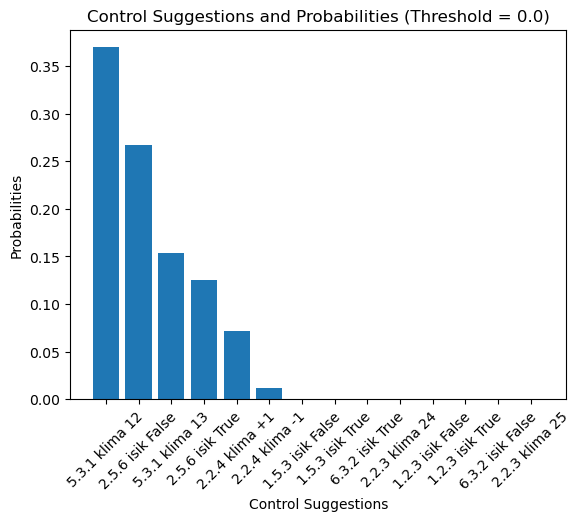

In [16]:
threshold = 0.0

control_suggestions = predict_control_suggestions(18, 1, 0, 1, 4, threshold)

print(control_suggestions)

# Extract control suggestions and probabilities separately
suggestions = [item[0] for item in control_suggestions]
probabilities = [item[1] for item in control_suggestions]

# Create a bar chart to visualize control suggestions and probabilities
plt.bar(suggestions, probabilities)
plt.xlabel('Control Suggestions')
plt.ylabel('Probabilities')
plt.title('Control Suggestions and Probabilities (Threshold = {})'.format(threshold))
plt.xticks(rotation=45)
plt.show()

In [17]:
print(model.predict([[4,1,0,1,4]]))

1/1 [==============================] - 0s 87ms/step
[[2.8050906e-04 5.4709429e-01 9.6311169e-06 1.0683148e-05 5.2803021e-04
  7.2406948e-02 1.2634880e-06 1.3879844e-05 1.3052050e-06 7.0061429e-18
  1.5262724e-08 2.1066745e-13 3.7890396e-01 7.4945047e-04]]
